In [1]:
from torchvision import models
from torchsummary import summary

In [2]:
import torch

In [3]:
alexnet = models.resnet34(pretrained=True)

In [21]:
summary(alexnet, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [23]:
from torchvision import transforms
transform = transforms.Compose([            #[1]
 transforms.Resize(256),                    #[2]
 transforms.CenterCrop(224),                #[3]
 transforms.ToTensor(),                     #[4]
 transforms.Normalize(                      #[5]
 mean=[0.485, 0.456, 0.406],                #[6]
 std=[0.229, 0.224, 0.225]                  #[7]
 )
])

In [24]:
print(alexnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [58]:
weight_layer_no = 0
param = 0.5

#x = alexnet.features[weight_layer_no].weight
x = alexnet.layer4[2].conv2.weight

std = torch.std(x)
y = abs(x) < (param * std)
prunable = y.sum().item()
percent = (prunable / x.numel()) * 100
prunable, percent

(958606, 40.631018744574654)

In [60]:
# For Debugging

import torch.nn as nn
for a, b in enumerate(nn.ModuleList(list(alexnet.children())).eval()):
    print(a, b)

0 Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
1 BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
2 ReLU(inplace)
3 MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
4 Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
 

In [61]:
# For Debugging

import torch.nn as nn
for a, b in enumerate(nn.ModuleList(list(alexnet.children())[:-1]).eval()):
    if isinstance(b, nn.ReLU):
        #print(a, b)
        pass
    try:
        for a1, b1 in enumerate(b):
            if b1.downsample is not None:
                print(b1)
            for a2, b2 in enumerate(b1.children()):
                if isinstance(b2, nn.ReLU):
                    #print(a2, b2)
                    pass
    except:
        pass

BasicBlock(
  (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (downsample): Sequential(
    (0): Conv2d(64, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
)
BasicBlock(
  (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (downsa

In [62]:
list(alexnet.children())[0]

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

In [63]:
# Activation Sparsity

In [64]:
class AlexNet(torch.nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        features = list(alexnet.children())[:-1]
        self.features = nn.ModuleList(features).eval() 
    def forward(self, x):
        results = []

        for a, model in enumerate(self.features):
            if isinstance(model, nn.ReLU):
                x = model(x)
                results.append(x)
            else:
                try:
                    for a1, model1 in enumerate(model):
                        if model1.downsample is not None:
                            identity = model1.downsample(x)
                        else:
                            identity = x
                        
                        for a2, model2 in enumerate(model1.children()):
                            try:
                                x = model2(x)
                                if isinstance(model2, nn.ReLU):
                                    results.append(x)
                            except:
                                pass
                        
                        x += identity
                except:
                    x = model(x)
    
        alex_outputs = namedtuple("AlexOutputs", ['relu' + str(i) for i in range(len(results))])
        
        return alex_outputs(*results)

In [65]:
from torchvision import datasets
dataset = datasets.ImageFolder(root='C:\\Data', transform=transform)

In [66]:
from collections import namedtuple

In [67]:
import matplotlib.pyplot as plt

In [135]:
image_no = 3
layer_no = 15
feature_no = 5

len(results)

17

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[]

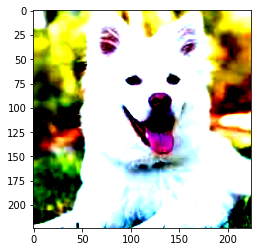

In [136]:
plt.imshow(torch.transpose(torch.transpose(dataset[image_no][0], dim0 = 0, dim1 = 2), dim0 = 0, dim1 = 1))
plt.plot()

[]

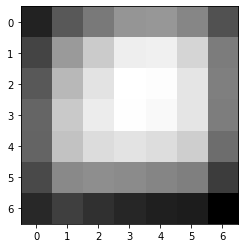

In [137]:
net = AlexNet()
results = net(dataset[image_no][0].unsqueeze(0))
out = results[layer_no].squeeze(0)[feature_no].detach().numpy()
plt.imshow(out, cmap = 'gray')
plt.plot()

In [138]:
out.shape

(7, 7)

In [72]:
sparsity = (out == 0).sum() / (out.shape[0] * out.shape[1]) * 100
sparsity

100.0

In [73]:
# Average sparsity calculation for entire layer

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[]

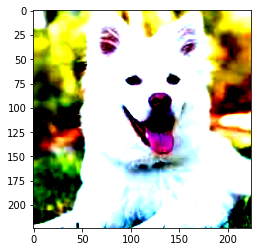

In [132]:
image_no = 3
layer_no = 15

plt.imshow(torch.transpose(torch.transpose(dataset[image_no][0], dim0 = 0, dim1 = 2), dim0 = 0, dim1 = 1))
plt.plot()

In [133]:
net = AlexNet()
results = net(dataset[image_no][0].unsqueeze(0))

layer_mat = results[layer_no].squeeze(0)
num_features = layer_mat.shape[0]

print(num_features)

sparsity = 0
for feature_no in range(num_features):  
    out = layer_mat[feature_no].detach().numpy()
    sparsity +=  (out == 0).sum() / (out.shape[0] * out.shape[1]) * 100

sparsity = sparsity / num_features

sparsity

512


10.004783163265309